## Introduction

## Importing and Cleaning Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

In [2]:
#importing csv to dataframe
df = pd.read_csv('data\kc_house_data.csv')

In [3]:
#filling the nan's with 0, all is categorical columns with the mode being 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

df.loc[df['sqft_basement'] == '?'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [4]:
# changing columns from float to int
col_floats = ['price', 'waterfront', 'view', 'yr_renovated']
for col in col_floats:
    df[col] = df[col].astype(int)

In [5]:
#expanding the date column to a column for each month and year
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year

In [6]:
#creating seasonal columns
df['sold_spring_time'] = df['month_sold'] < 4
df['sold_summer_time'] = (df['month_sold'] > 3) & (df['month_sold'] < 7)
df['sold_fall_time'] = (df['month_sold'] > 6) & (df['month_sold'] < 10)
df['sold_winter_time'] = (df['month_sold'] > 9) & (df['month_sold'] < 13)

df['sold_spring_time'] = df['sold_spring_time'].astype(bool).astype(int)
df['sold_summer_time'] = df['sold_summer_time'].astype(bool).astype(int)
df['sold_fall_time'] = df['sold_fall_time'].astype(bool).astype(int)
df['sold_winter_time'] = df['sold_winter_time'].astype(bool).astype(int)

In [7]:
#converting 'yr_renovated' and 'sqft_basement' into a boolean
df['has_renovated'] = df['yr_renovated'].astype(bool).astype(int)
df['has_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [8]:
#deleting columns not neccesary in dataframe
df.drop('date', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [9]:
# exports a clean version of raw data.
df.to_csv('data\Cleaned_kc_house_data.csv')

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,1340,5650,10,2014,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,1690,7639,12,2014,0,0,0,1,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,2720,8062,2,2015,1,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,1360,5000,12,2014,0,0,0,1,0,1
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,1800,7503,2,2015,1,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
price               21597 non-null int32
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null int32
view                21597 non-null int32
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null int32
yr_built            21597 non-null int64
yr_renovated        21597 non-null int32
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
month_sold          21597 non-null int64
year_sold           21597 non-null int64
sold_spring_time    21

## EDA and Scrubbing

### price

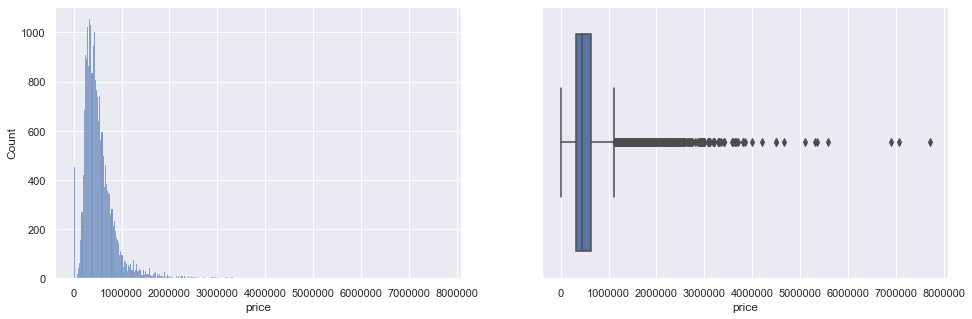

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

#looking for potential outliars
sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

In [13]:
#Making the 'price' benchmark between $100000 to $900000
df.drop(df[df['price'] > 900000].index, inplace = True)
df.drop(df[df['price'] < 100000].index, inplace = True)

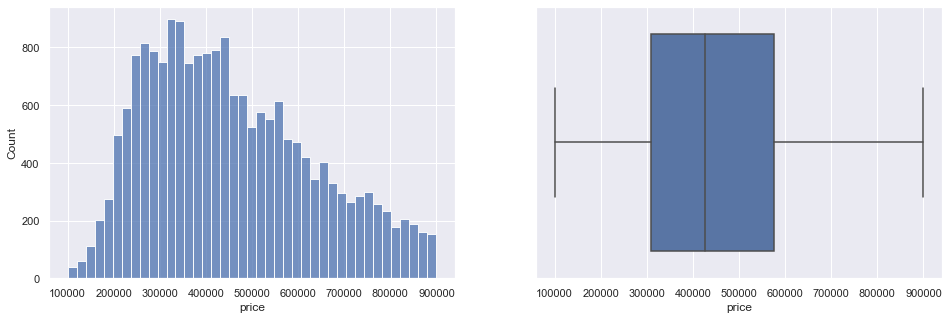

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

>The histogram and boxplot looks to be more normally distributed after removing outliers

In [15]:
#checking the rows left
df.shape

(19124, 27)

### bedrooms

In [16]:
df['bedrooms'].value_counts()

3     9179
4     5729
2     2631
5     1161
6      198
1      185
7       25
8        9
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
df.drop(df[df['bedrooms'] > 6].index, inplace = True)

In [18]:
df['bedrooms'].value_counts()

3    9179
4    5729
2    2631
5    1161
6     198
1     185
Name: bedrooms, dtype: int64

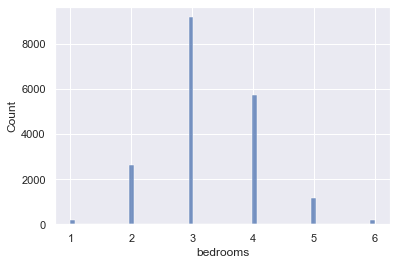

In [19]:
sns.histplot(data = df, x='bedrooms');

In [20]:
df.shape

(19083, 27)

### bathrooms

In [21]:
df['bathrooms'].value_counts()

2.50    4849
1.00    3715
1.75    2912
2.25    1844
2.00    1839
1.50    1385
2.75     980
3.00     578
3.50     434
3.25     324
0.75      69
3.75      50
4.00      43
4.50      23
4.25      18
1.25       7
5.00       5
0.50       3
4.75       2
5.25       2
6.00       1
Name: bathrooms, dtype: int64

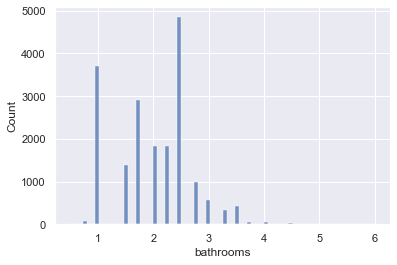

In [22]:
sns.histplot(data=df, x = 'bathrooms');

In [23]:
df.drop(df[df['bathrooms'] > 4].index, inplace = True)
df.drop(df[df['bathrooms'] < 0.75].index, inplace = True)

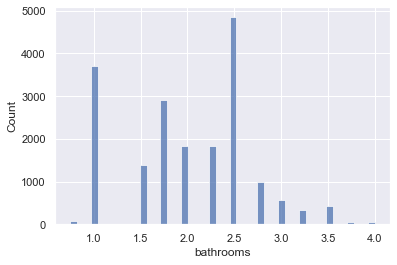

In [24]:
sns.histplot(data=df, x = 'bathrooms');

In [25]:
df.shape

(19029, 27)

### sqft_living

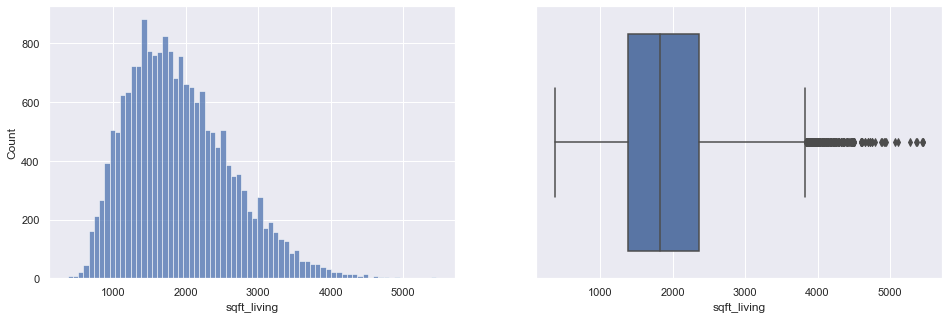

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [27]:
df.drop(df[df['sqft_living'] > 4500].index, inplace = True)

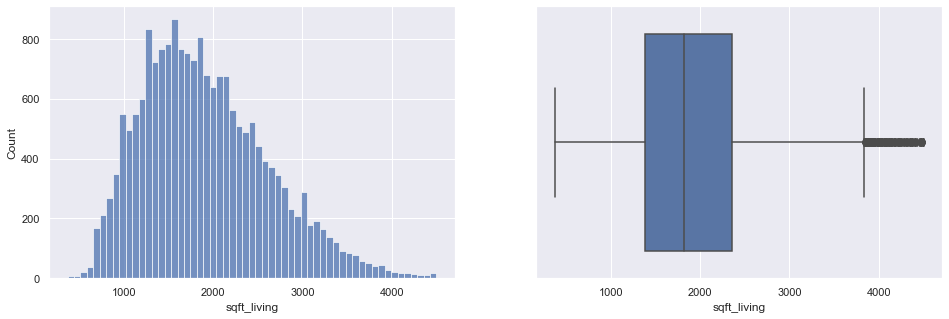

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [29]:
df.shape

(19000, 27)

### sqft_lot

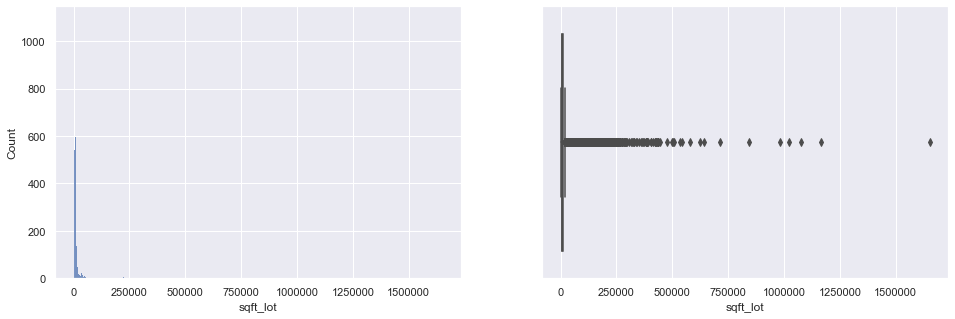

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [31]:
df.drop(df[df['sqft_lot'] > 17500].index, inplace = True)

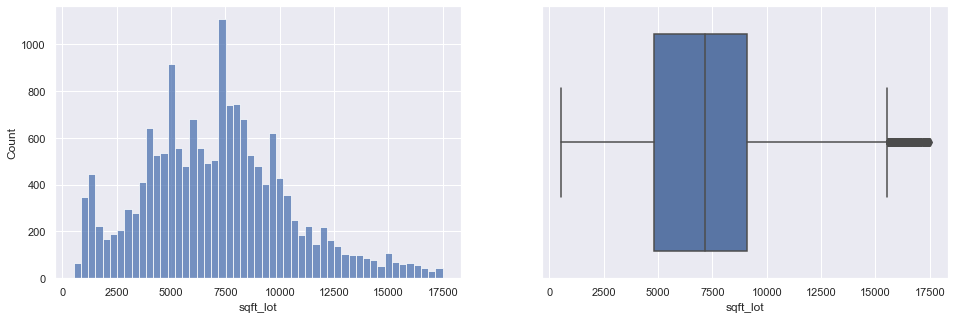

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [33]:
df.shape

(16935, 27)

### sqft_basement

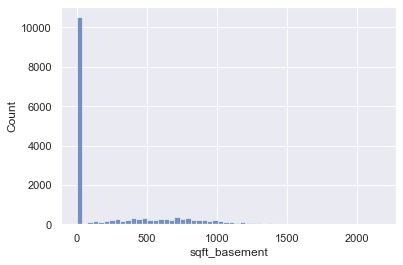

In [34]:
sns.histplot(data=df, x='sqft_basement');

In [35]:
df['has_basement'].describe()

count    16935.000000
mean         0.379037
std          0.485162
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: has_basement, dtype: float64

In [36]:
df.drop(df[df['sqft_basement'] > 1300].index, inplace=True)

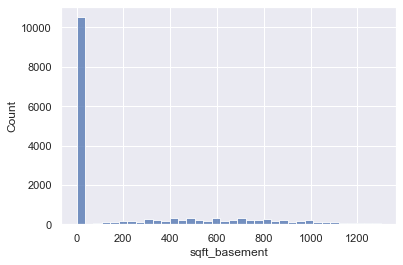

In [37]:
sns.histplot(data = df, x='sqft_basement');

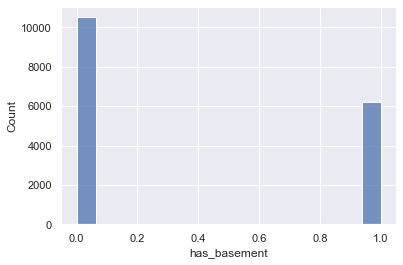

In [38]:
sns.histplot(data = df, x='has_basement');

In [39]:
df.shape

(16709, 27)

### floors

In [40]:
df['floors'].value_counts()

1.0    8720
2.0    5896
1.5    1481
3.0     524
2.5      82
3.5       6
Name: floors, dtype: int64

In [41]:
df.drop(df[df['floors'] > 3].index, inplace=True)

In [42]:
df['floors'].value_counts()

1.0    8720
2.0    5896
1.5    1481
3.0     524
2.5      82
Name: floors, dtype: int64

### grade and condition

In [43]:
df['grade'].value_counts()

7     8012
8     4832
6     1807
9     1504
10     330
5      180
11      20
4       17
3        1
Name: grade, dtype: int64

In [44]:
df['condition'].value_counts()

3    10956
4     4331
5     1275
2      123
1       18
Name: condition, dtype: int64

### sqft_lot15

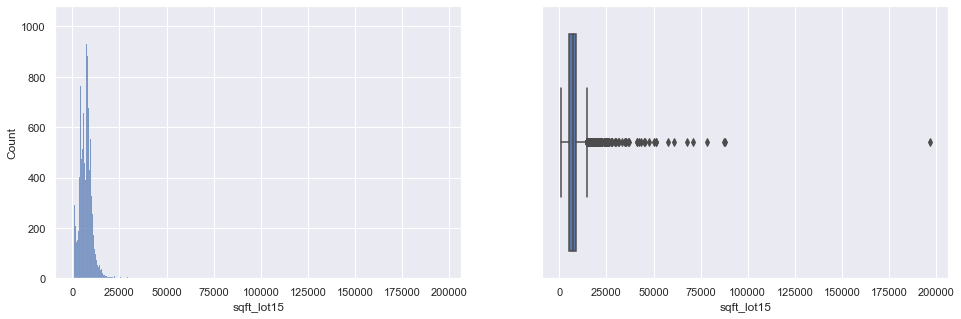

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [46]:
df.drop(df[df['sqft_lot15'] > 25000].index, inplace=True)

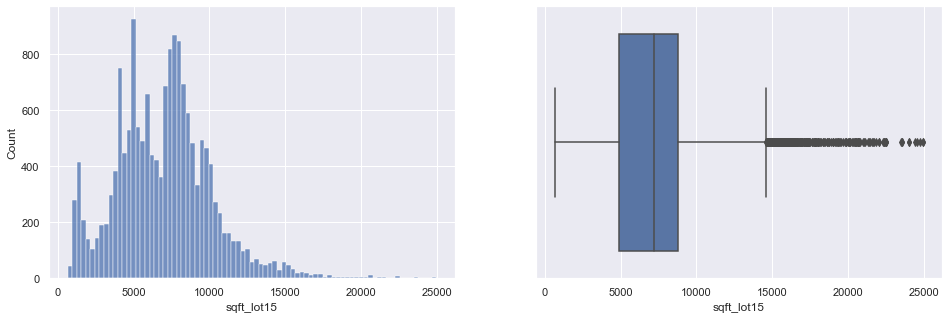

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [48]:
df.shape

(16658, 27)

### sqft_living15

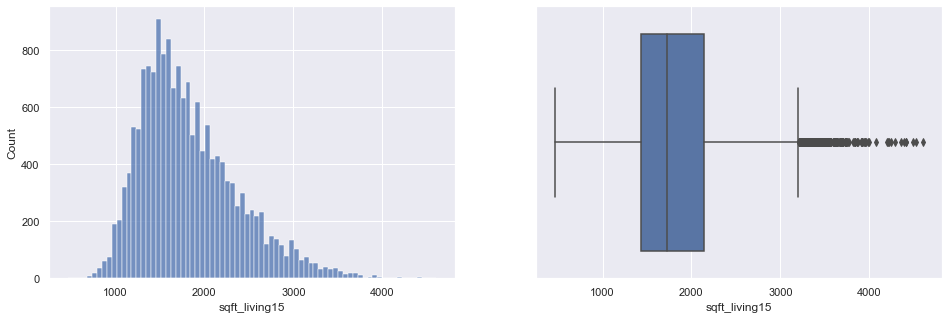

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living15', ax = ax[0])
sns.boxplot(data=df, x='sqft_living15', ax=ax[1]);

## Continuous and Categorical Features

In [50]:
#df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
#df_cate = df[['condition', 'grade', 'zipcode']]

#pd.plotting.scatter_matrix(pd.concat([df_cont, df_cate], axis=1), figsize = [12,12])
#plt.show()

### Multi-collineary 

In [51]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

data_cont = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_cont['pairs'] = list(zip(data_cont.level_0, data_cont.level_1))
data_cont.set_index(['pairs'], inplace=True)
data_cont.drop(columns=['level_1', 'level_0'], inplace = True)
data_cont.columns = ['cc']
data_cont.drop_duplicates(inplace=True)
data_cont[(data_cont.cc>.70) & (data_cont.cc<1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.864460
"(sqft_living, sqft_above)",0.850810
"(sqft_living, sqft_living15)",0.737066
"(sqft_living15, sqft_above)",0.716950


>Above table are showing some highly correlated continuous columns. We'll be dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

In [52]:
#creating seperate dataframe from the original to make changes
df_b = df

In [53]:
#dropping the multicollinearies and unwanted columns
df_b.drop('lat', axis = 1, inplace = True)
df_b.drop('long', axis = 1, inplace = True)
df_b.drop('sqft_above', axis = 1, inplace = True)
df_b.drop('sqft_living15', axis = 1, inplace = True)
df_b.drop('sqft_lot15', axis = 1, inplace = True)

> We are dropping 'lat' and 'long' columns because we'll be using zipcode instead. As well as dropping the 'view' columns because we believe it's not a big determining factor for house prices.

### Categorical / One Hot Encoded

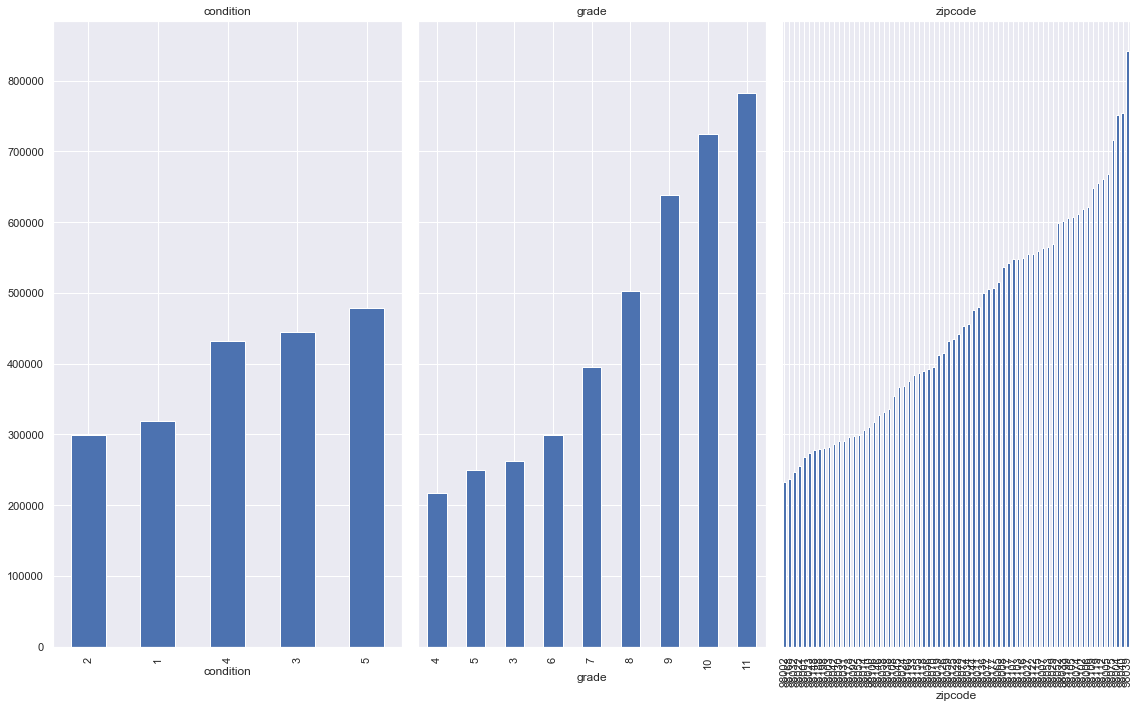

In [54]:
#looking at graphs to see columns shaped like a categorical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [55]:
features = df[feats].astype('category')

In [56]:
feats_ohe = pd.get_dummies(features, drop_first = True)

In [57]:
feats_ohe = feats_ohe.astype(int)

In [58]:
feats_ohe.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Baseline DataFrame

> Adding the new features to the baseline data

In [59]:
df_b = pd.concat([df_b, feats_ohe], axis = 1)

> dropping more unwanted columns from our baseline DataFrame

In [60]:
#dropping unwanted columns first
df_b.drop('view', axis = 1, inplace = True)
df_b.drop('yr_renovated', axis = 1, inplace = True)

>Dropping 'condition', 'grade', and 'zipcode' since they're replaced with one hot encoded features

In [61]:
df_b.drop('condition', axis = 1, inplace = True)
df_b.drop('grade', axis = 1, inplace = True)
df_b.drop('zipcode', axis = 1, inplace = True)

In [62]:
#checking to see the new dataset and ensuring that there is no missing values
df_b.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,month_sold,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900,3,1.00,1180,5650,1.0,0,0,1955,10,...,0,0,0,0,0,0,1,0,0,0
1,538000,3,2.25,2570,7242,2.0,0,400,1951,12,...,0,0,0,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,0,1933,2,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,910,1965,12,...,0,0,0,0,0,0,0,0,0,0
4,510000,3,2.00,1680,8080,1.0,0,0,1987,2,...,0,0,0,0,0,0,0,0,0,0


## Train-Test Split

In [63]:
#importing the necessary libraries for train-test split
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [64]:
y = df_b[['price']]
X = df_b.drop(['price'], axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = (123))

In [66]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

13326 3332 13326 3332


In [67]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Looking at the residuals and finding the MSE for training and test sets

In [68]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [69]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    5.376342e+09
dtype: float64
Test Mean Squarred Error: price    5.610215e+09
dtype: float64


In [70]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 5376342358.741447
Test Mean Squarred Error: 5610215071.379043


## First Model - Baseline


In [71]:
from statsmodels.formula.api import ols

In [72]:
outcome = 'price'
dftrain = pd.concat([X_train, y_train], axis = 1)

In [73]:
# Fitting the actual model
predictors = '+'.join(X.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     658.2
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:13:31   Log-Likelihood:            -1.6820e+05
No. Observations:               13326   AIC:                         3.366e+05
Df Residuals:                   13229   BIC:                         3.373e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -5.39e+07   4.18e+06    -12.889      0.000   -6.21e+07   -4.57e+07
bedrooms         -3527.6963   1038.578     -3.397      0.001   -5563.459   -1491.934
bathrooms         1.254e+04   1686.849      7.433      0.000    9231.734    1.58e+04
sqft_living        125.8305      2.070     60.781      0.000     121.773     129.888
sqft_lot             1.4897      0.282      5.274      0.000       0.936       2.043
floors            -1.67e+04   2020.580     -8.264      0.000   -2.07e+04   -1.27e+04
waterfront         3.35e+05   2.08e+04     16.135      0.000    2.94e+05    3.76e+05
sqft_basement      -55.8992      4.196    -13.322      0.000     -64.124     -47.675
yr_built          -513.5214     39.689    -12.939      0.000    -591.318    -435.725
month_sold        2916.7939    881.356      3.309      0.001    1189.210    4644.377
year_sold         3.395e+04   2593.006     13.091      0.000    2.89e+04     3.9e+04
sold_spring_time -1.348e+07   1.05e+06    -12.891      0.000   -1.55e+07   -1.14e+07
sold_summer_time -1.346e+07   1.05e+06    -12.884      0.000   -1.55e+07   -1.14e+07
sold_fall_time   -1.348e+07   1.05e+06    -12.893      0.000   -1.55e+07   -1.14e+07
sold_winter_time -1.348e+07   1.05e+06    -12.887      0.000   -1.55e+07   -1.14e+07
has_renovated      2.19e+04   4232.259      5.174      0.000    1.36e+04    3.02e+04
has_basement      1.502e+04   2783.756      5.397      0.000    9567.780    2.05e+04
condition_2       5.032e+04      2e+04      2.520      0.012    1.12e+04    8.95e+04
condition_3       9.166e+04   1.87e+04      4.908      0.000    5.51e+04    1.28e+05
condition_4       1.107e+05   1.87e+04      5.926      0.000    7.41e+04    1.47e+05
condition_5       1.397e+05   1.88e+04      7.437      0.000    1.03e+05    1.77e+05
grade_4          -9.671e+04   7.66e+04     -1.263      0.207   -2.47e+05    5.34e+04
grade_5          -1.239e+05   7.42e+04     -1.670      0.095   -2.69e+05    2.15e+04
grade_6          -1.099e+05    7.4e+04     -1.486      0.137   -2.55e+05    3.51e+04
grade_7           -7.74e+04    7.4e+04     -1.046      0.296   -2.22e+05    6.77e+04
grade_8          -3.258e+04    7.4e+04     -0.440      0.660   -1.78e+05    1.13e+05
grade_9           3.189e+04   7.41e+04      0.430      0.667   -1.13e+05    1.77e+05
grade_10          5.382e+04   7.42e+04      0.725      0.469   -9.17e+04    1.99e+05
grade_11          1.049e+05   7.62e+04      1.375      0.169   -4.46e+04    2.54e+05
zipcode_98002     4177.8626   7834.362      0.533      0.594   -1.12e+04    1.95e+04
zipcode_98003     2608.4257   7200.270      0.362      0.717   -1.15e+04    1.67e+04
zipcode_98004     4.839e+05   9677.045     50.002      0.000    4.65e+05    5.03e+05
zipcode_98005     3.194e+05      1e+04     31.858      0.000       3e+05    3.39e+05
zipcode_98006     2.595

R-squared: 0.826

Adj R-squared: 0.825

Number of significant p_values: 13

### Checking QQ Plot

In [74]:
import statsmodels.api as sm

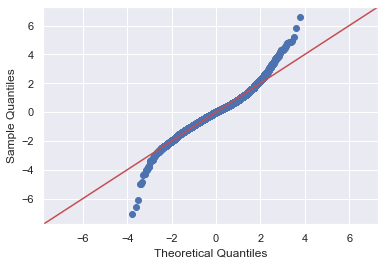

In [75]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for Homoscedasticity

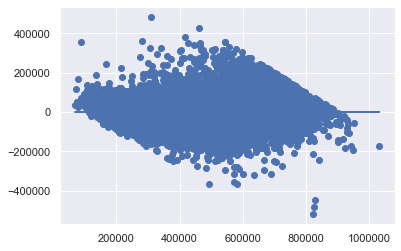

In [76]:
plt.scatter(model.predict(dftrain[X.columns]), model.resid)
plt.plot(model.predict(dftrain[X.columns]), [0 for i in range(len(dftrain))])

## Second Model - Multicollinearies

In [77]:
#Importing variance inflation factor to check for multicollinearies 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
col = df_b[X.columns]
vif = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
list(zip(X.columns, vif))

[('bedrooms', 1.8486457317494929),
 ('bathrooms', 3.134798084509153),
 ('sqft_living', 4.497053988010726),
 ('sqft_lot', 2.1370658150426642),
 ('floors', 2.9333031977278),
 ('waterfront', 1.0524487446167563),
 ('sqft_basement', 5.455682442773614),
 ('yr_built', 3.449855116204015),
 ('month_sold', 18.59815009628652),
 ('year_sold', 3.644949779844314),
 ('sold_spring_time', 12961382.45735248),
 ('sold_summer_time', 21014032.548201226),
 ('sold_fall_time', 18578191.557492092),
 ('sold_winter_time', 14981192.955795307),
 ('has_renovated', 1.111517553875704),
 ('has_basement', 4.4517004552066),
 ('condition_2', 7.777263110420177),
 ('condition_3', 213.9301250303895),
 ('condition_4', 182.07763476845517),
 ('condition_5', 67.59266186796314),
 ('grade_4', 18.140114973568046),
 ('grade_5', 179.58485704693632),
 ('grade_6', 1621.8206696248637),
 ('grade_7', 4196.256949202702),
 ('grade_8', 3461.1357344450926),
 ('grade_9', 1380.6300188227347),
 ('grade_10', 328.2306496186602),
 ('grade_11', 21.

In [79]:
vif_scores = list(zip(X.columns, vif))
v_test = [x for x, vif in vif_scores if vif > 10]
print(len(vif_scores), len(v_test))

97 16


In [80]:
v_test

['month_sold',
 'sold_spring_time',
 'sold_summer_time',
 'sold_fall_time',
 'sold_winter_time',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11']

In [81]:
for v in v_test:
    dftrain.drop(v, axis=1, inplace=True)

In [82]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13326 entries, 16497 to 20474
Data columns (total 82 columns):
bedrooms         13326 non-null int64
bathrooms        13326 non-null float64
sqft_living      13326 non-null int64
sqft_lot         13326 non-null int64
floors           13326 non-null float64
waterfront       13326 non-null int32
sqft_basement    13326 non-null int32
yr_built         13326 non-null int64
year_sold        13326 non-null int64
has_renovated    13326 non-null int32
has_basement     13326 non-null int32
condition_2      13326 non-null int32
zipcode_98002    13326 non-null int32
zipcode_98003    13326 non-null int32
zipcode_98004    13326 non-null int32
zipcode_98005    13326 non-null int32
zipcode_98006    13326 non-null int32
zipcode_98007    13326 non-null int32
zipcode_98008    13326 non-null int32
zipcode_98010    13326 non-null int32
zipcode_98011    13326 non-null int32
zipcode_98014    13326 non-null int32
zipcode_98019    13326 non-null int32
zipcode_9

In [83]:
updf_b = dftrain.drop(['price'], axis=1)
predictors = '+'.join(updf_b.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     656.8
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:13:44   Log-Likelihood:            -1.6913e+05
No. Observations:               13326   AIC:                         3.384e+05
Df Residuals:                   13244   BIC:                         3.390e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.042e+07   2.96e+06    -13.671      0.000   -4.62e+07   -3.46e+07
bedrooms      -9281.4843   1090.411     -8.512      0.000   -1.14e+04   -7144.123
bathrooms      1.788e+04   1783.869     10.023      0.000    1.44e+04    2.14e+04
sqft_living     163.8056      1.911     85.719      0.000     160.060     167.551
sqft_lot          2.4154      0.300      8.048      0.000       1.827       3.004
floors        -1.471e+04   2155.192     -6.826      0.000   -1.89e+04   -1.05e+04
waterfront     3.355e+05   2.22e+04     15.112      0.000    2.92e+05    3.79e+05
sqft_basement   -75.2671      4.411    -17.065      0.000     -83.913     -66.622
yr_built       -313.5706     38.209     -8.207      0.000    -388.466    -238.675
year_sold      2.036e+04   1467.397     13.872      0.000    1.75e+04    2.32e+04
has_renovated  1.317e+04   4477.371      2.942      0.003    4396.936    2.19e+04
has_basement   1.886e+04   2967.498      6.355      0.000     1.3e+04    2.47e+04
condition_2   -5.991e+04   7909.389     -7.575      0.000   -7.54e+04   -4.44e+04
zipcode_98002  5311.1415   8380.044      0.634      0.526   -1.11e+04    2.17e+04
zipcode_98003  1.325e+04   7704.382      1.720      0.086   -1853.758    2.83e+04
zipcode_98004   5.05e+05   1.03e+04     48.809      0.000    4.85e+05    5.25e+05
zipcode_98005  3.538e+05   1.07e+04     33.050      0.000    3.33e+05    3.75e+05
zipcode_98006  3.001e+05   7558.055     39.712      0.000    2.85e+05    3.15e+05
zipcode_98007   2.72e+05   9906.276     27.453      0.000    2.53e+05    2.91e+05
zipcode_98008  2.635e+05   7747.589     34.016      0.000    2.48e+05    2.79e+05
zipcode_98010  8.667e+04   1.36e+04      6.378      0.000       6e+04    1.13e+05
zipcode_98011  1.625e+05   8526.028     19.055      0.000    1.46e+05    1.79e+05
zipcode_98014  9.316e+04   1.46e+04      6.385      0.000    6.46e+04    1.22e+05
zipcode_98019  9.164e+04   9247.808      9.909      0.000    7.35e+04     1.1e+05
zipcode_98022  1.375e+04   8937.706      1.538      0.124   -3774.176    3.13e+04
zipcode_98023 -4097.0883   6818.164     -0.601      0.548   -1.75e+04    9267.488
zipcode_98024  1.307e+05   1.94e+04      6.745      0.000    9.27e+04    1.69e+05
zipcode_98027  2.537e+05   7995.215     31.735      0.000    2.38e+05    2.69e+05
zipcode_98028   1.49e+05   7946.571     18.749      0.000    1.33e+05    1.65e+05
zipcode_98029  2.672e+05   7620.023     35.071      0.000    2.52e+05    2.82e+05
zipcode_98030   1.08e+04   7952.553      1.359      0.174   -4783.467    2.64e+04
zipcode_98031   2.05e+04   7818.500      2.622      0.009    5178.620    3.58e+04
zipcode_98032  7794.3599   9990.791      0.780      0.435   -1.18e+04    2.74e+04
zipcode_98033  3.251e+05   7376.907     44.068      0.000    3.11e+05     3.4e+05
zipcode_98034  1.948e+05   6727.028     28.952   

### QQ Plot

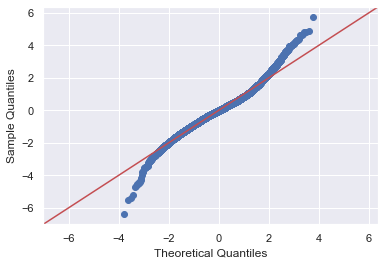

In [84]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasticity

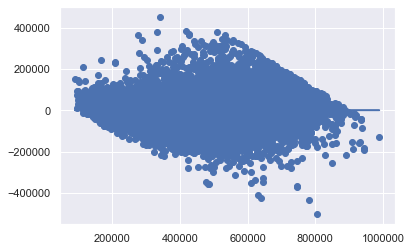

In [85]:
plt.scatter(model.predict(dftrain[updf_b.columns]), model.resid)
plt.plot(model.predict(dftrain[updf_b.columns]), [0 for i in range(len(dftrain))])

## Third Model - P_Values

In [86]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))

print(x_cols[:])
p_table.head()

82 74
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_basement', 'yr_built', 'year_sold', 'has_renovated', 'has_basement', 'condition_2', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98031', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-4.042e+07,2.96e+06,-13.671,0.0,-4.62e+07,-3.46e+07
bedrooms,-9281.4843,1090.411,-8.512,0.0,-1.14e+04,-7144.123
bathrooms,1.788e+04,1783.869,10.023,0.0,1.44e+04,2.14e+04
sqft_living,163.8056,1.911,85.719,0.0,160.060,167.551
sqft_lot,2.4154,0.300,8.048,0.0,1.827,3.004


In [87]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     718.5
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:13:45   Log-Likelihood:            -1.6914e+05
No. Observations:               13326   AIC:                         3.384e+05
Df Residuals:                   13251   BIC:                         3.390e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.045e+07   2.96e+06    -13.682      0.000   -4.62e+07   -3.47e+07
bedrooms      -9285.8366   1089.751     -8.521      0.000   -1.14e+04   -7149.769
bathrooms      1.792e+04   1783.053     10.050      0.000    1.44e+04    2.14e+04
sqft_living     163.6019      1.909     85.710      0.000     159.860     167.343
sqft_lot          2.4318      0.299      8.131      0.000       1.846       3.018
floors        -1.471e+04   2154.686     -6.826      0.000   -1.89e+04   -1.05e+04
waterfront     3.347e+05   2.22e+04     15.075      0.000    2.91e+05    3.78e+05
sqft_basement   -75.2786      4.411    -17.067      0.000     -83.924     -66.633
yr_built       -317.1397     38.118     -8.320      0.000    -391.856    -242.423
year_sold      2.038e+04   1467.481     13.887      0.000    1.75e+04    2.33e+04
has_renovated  1.331e+04   4475.739      2.974      0.003    4535.824    2.21e+04
has_basement   1.886e+04   2966.219      6.357      0.000     1.3e+04    2.47e+04
condition_2    -6.04e+04   7908.099     -7.637      0.000   -7.59e+04   -4.49e+04
zipcode_98004  5.013e+05   9080.980     55.199      0.000    4.83e+05    5.19e+05
zipcode_98005  3.501e+05   9491.722     36.887      0.000    3.32e+05    3.69e+05
zipcode_98006  2.966e+05   5715.389     51.887      0.000    2.85e+05    3.08e+05
zipcode_98007  2.683e+05   8578.715     31.278      0.000    2.52e+05    2.85e+05
zipcode_98008  2.599e+05   5944.101     43.723      0.000    2.48e+05    2.72e+05
zipcode_98010  8.294e+04   1.27e+04      6.550      0.000    5.81e+04    1.08e+05
zipcode_98011  1.589e+05   6938.650     22.904      0.000    1.45e+05    1.73e+05
zipcode_98014  8.942e+04   1.37e+04      6.505      0.000    6.25e+04    1.16e+05
zipcode_98019  8.812e+04   7824.936     11.262      0.000    7.28e+04    1.03e+05
zipcode_98024  1.269e+05   1.87e+04      6.773      0.000    9.02e+04    1.64e+05
zipcode_98027  2.502e+05   6255.573     40.004      0.000    2.38e+05    2.63e+05
zipcode_98028  1.454e+05   6219.315     23.380      0.000    1.33e+05    1.58e+05
zipcode_98029  2.638e+05   5773.000     45.694      0.000    2.52e+05    2.75e+05
zipcode_98031  1.692e+04   6050.732      2.796      0.005    5059.441    2.88e+04
zipcode_98033  3.215e+05   5462.890     58.846      0.000    3.11e+05    3.32e+05
zipcode_98034  1.911e+05   4543.585     42.070      0.000    1.82e+05       2e+05
zipcode_98038  3.865e+04   4547.404      8.498      0.000    2.97e+04    4.76e+04
zipcode_98039  6.322e+05    7.9e+04      8.006      0.000    4.77e+05    7.87e+05
zipcode_98040  4.446e+05   9317.965     47.711      0.000    4.26e+05    4.63e+05
zipcode_98042  1.393e+04   4674.450      2.979      0.003    4764.860    2.31e+04
zipcode_98045  1.016e+05   8106.404     12.539      0.000    8.58e+04    1.18e+05
zipcode_98052  2.777e+05   4637.924     59.887   

### QQ plot

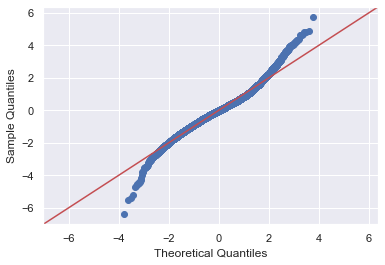

In [88]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasiticity

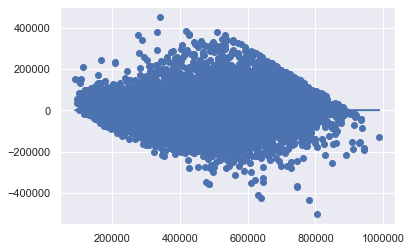

In [89]:
plt.scatter(model.predict(dftrain[x_cols]), model.resid)
plt.plot(model.predict(dftrain[x_cols]), [0 for i in range(len(dftrain))]);

## Fourth Model (final) - Transformation

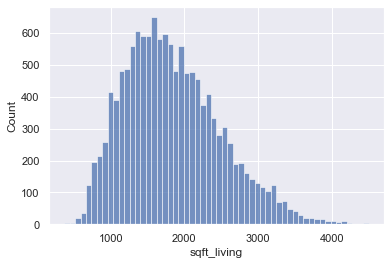

In [90]:
cont = ['sqft_living','sqft_lot']

sns.histplot(data = dftrain, x = 'sqft_living');

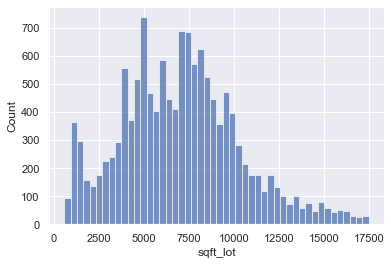

In [91]:
sns.histplot(data = dftrain, x = 'sqft_lot');

In [92]:
dfcont = dftrain[cont]
log_names = [f'{column}_log' for column in dfcont.columns]

df_log = np.log(dfcont)
df_log.columns = log_names

for col in df_log:
    dftrain[col] = df_log[col]

In [93]:
dftrain

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,year_sold,has_renovated,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,price,sqft_living_log,sqft_lot_log
16497,4,3.00,2240,8504,2.0,0,0,1992,2014,0,...,0,0,0,0,0,0,0,337000,7.714231,9.048292
8204,2,1.00,860,5800,1.0,0,0,1942,2014,0,...,0,0,0,0,0,0,0,222900,6.756932,8.665613
7934,3,1.75,1830,5488,1.0,0,820,1939,2014,0,...,0,0,0,0,0,0,0,450000,7.512071,8.610319
15424,4,2.50,2390,4639,2.0,0,0,2006,2015,0,...,0,0,0,0,0,0,0,278226,7.779049,8.442254
20916,4,2.50,1610,4052,2.0,0,0,2013,2014,0,...,0,0,0,0,0,0,0,286950,7.383989,8.306966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,4,2.50,2070,4310,2.0,0,0,2004,2015,0,...,0,0,0,0,0,0,0,430000,7.635304,8.368693
17533,4,2.50,2220,6800,2.0,0,0,2002,2014,0,...,0,0,0,0,0,0,0,419950,7.705262,8.824678
10138,3,1.00,1290,8974,1.0,0,0,1976,2014,0,...,0,0,0,0,0,0,0,373000,7.162397,9.102087
20049,3,2.25,1380,1621,2.0,0,240,2007,2014,0,...,0,0,0,0,0,0,0,475000,7.229839,7.390799


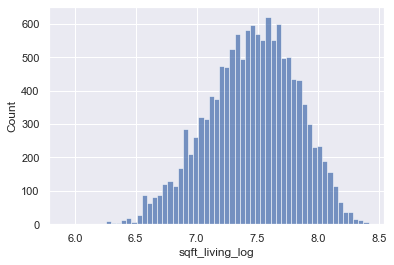

In [94]:
sns.histplot(data = dftrain, x = 'sqft_living_log');

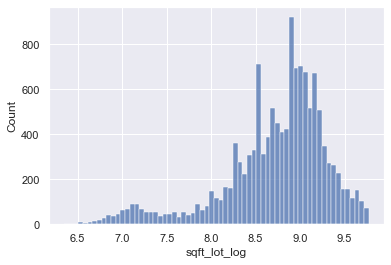

In [95]:
sns.histplot(data = dftrain, x = 'sqft_lot_log');

In [96]:
x_cols.remove('sqft_living')
x_cols.remove('sqft_lot')

x_cols.append('sqft_living_log')
x_cols.append('sqft_lot_log')

In [97]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     670.6
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:13:47   Log-Likelihood:            -1.6951e+05
No. Observations:               13326   AIC:                         3.392e+05
Df Residuals:                   13251   BIC:                         3.397e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.327e+07   3.04e+06    -14.235      0.000   -4.92e+07   -3.73e+07
bedrooms        -1.229e+04   1143.263    -10.749      0.000   -1.45e+04      -1e+04
bathrooms        1.924e+04   1846.600     10.418      0.000    1.56e+04    2.29e+04
floors          -1054.2111   2379.423     -0.443      0.658   -5718.220    3609.798
waterfront       3.279e+05   2.28e+04     14.377      0.000    2.83e+05    3.73e+05
sqft_basement     -51.9573      4.488    -11.576      0.000     -60.755     -43.160
yr_built         -199.5400     40.480     -4.929      0.000    -278.886    -120.194
year_sold        2.067e+04   1508.323     13.702      0.000    1.77e+04    2.36e+04
has_renovated    1.421e+04   4601.873      3.087      0.002    5186.232    2.32e+04
has_basement     2784.2006   3042.151      0.915      0.360   -3178.851    8747.252
condition_2     -5.343e+04   8133.766     -6.569      0.000   -6.94e+04   -3.75e+04
zipcode_98004     5.02e+05   9335.155     53.771      0.000    4.84e+05     5.2e+05
zipcode_98005    3.536e+05   9749.946     36.269      0.000    3.35e+05    3.73e+05
zipcode_98006    3.006e+05   5866.632     51.244      0.000    2.89e+05    3.12e+05
zipcode_98007      2.7e+05   8818.363     30.613      0.000    2.53e+05    2.87e+05
zipcode_98008    2.615e+05   6116.452     42.746      0.000    2.49e+05    2.73e+05
zipcode_98010    8.472e+04    1.3e+04      6.510      0.000    5.92e+04     1.1e+05
zipcode_98011    1.645e+05   7129.910     23.067      0.000     1.5e+05    1.78e+05
zipcode_98014    9.118e+04   1.41e+04      6.464      0.000    6.35e+04    1.19e+05
zipcode_98019    9.204e+04   8040.613     11.446      0.000    7.63e+04    1.08e+05
zipcode_98024    1.371e+05   1.93e+04      7.123      0.000    9.94e+04    1.75e+05
zipcode_98027    2.705e+05   6456.952     41.886      0.000    2.58e+05    2.83e+05
zipcode_98028    1.468e+05   6389.365     22.969      0.000    1.34e+05    1.59e+05
zipcode_98029    2.698e+05   5932.282     45.477      0.000    2.58e+05    2.81e+05
zipcode_98031    1.348e+04   6218.181      2.168      0.030    1294.436    2.57e+04
zipcode_98033     3.24e+05   5615.927     57.692      0.000    3.13e+05    3.35e+05
zipcode_98034    1.921e+05   4670.474     41.121      0.000    1.83e+05    2.01e+05
zipcode_98038    3.761e+04   4664.978      8.063      0.000    2.85e+04    4.68e+04
zipcode_98039    6.203e+05   8.12e+04      7.643      0.000    4.61e+05    7.79e+05
zipcode_98040    4.465e+05   9569.289     46.657      0.000    4.28e+05    4.65e+05
zipcode_98042    1.563e+04   4803.185      3.255      0.001    6218.746     2.5e+04
zipcode_98045    9.918e+04   8324.516     11.915      0.000    8.29e+04    1.16e+05
zipcode_98052    2.843e+05   4764.378     59.673      0.000    2.75e+05    2.94e+05
zipcode_98053    2.581e+05   6774.669     38.105      0.000

### QQ Plot

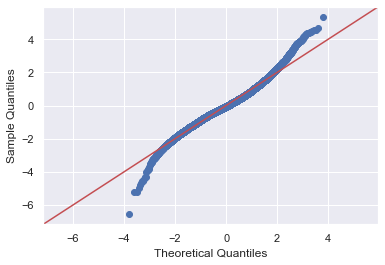

In [98]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

###  Homoscedasiticity

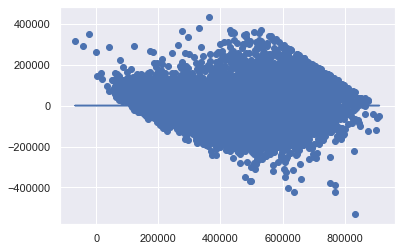

In [99]:
plt.scatter(model.predict(dftrain[x_cols]), model.resid)
plt.plot(model.predict(dftrain[x_cols]), [0 for i in range(len(dftrain))]);